In [1]:
print("Hello World")

Hello World


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Cargar el archivo .CSV

df = pd.read_csv("students.csv")

In [23]:
pd.set_option('display.max_columns', None)
df.head()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,1,0,18,1,1,1,4,4,at_home,teacher,course,mother,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,1,0,1,1,at_home,other,course,father,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,0,0,1,1,at_home,other,other,mother,1,2,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,1,0,4,2,health,services,home,mother,1,3,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,1,0,3,3,other,other,home,father,1,2,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [3]:
def null_percentage(df):
    percentage = df.isnull().mean() * 100
    return percentage.to_frame(name='Null Percentage')

In [4]:
def zero_percentage(df):
    percentage = (df == 0).mean() * 100
    return percentage.to_frame(name='Zero Percentage')

## Verificación de Cantidad de nulos y ceros

In [5]:
null_percentage(df)

,Null Percentage
school,0.0
sex,0.0
age,0.0
address,0.0
famsize,0.0
Parrent_status,0.0
Mother_edu,0.0
Father_edu,0.0
Mother_job,0.0
Father_job,0.0


In [6]:
zero_percentage(df)

,Zero Percentage
school,0.000000
sex,0.000000
age,0.000000
address,0.000000
famsize,0.000000
Parrent_status,0.000000
Mother_edu,0.759494
Father_edu,0.506329
Mother_job,0.000000
Father_job,0.000000


* por Valores en nulo no se elimina nada 
* por Valores en 0 se elimina "failures"

## Elimincacion de columnas innecesarios

In [7]:
df.drop('failures', axis=1, inplace=True)

## Conversión de datos a binarios

In [8]:
df['school'] = df['school'].map({'GP': 1, 'MS': 0})

In [9]:
df['address'] = df['address'].map({'U': 1, 'R': 0})

In [10]:
df['famsize'] = df['famsize'].map({'GT3': 1, 'LE3': 0})

In [11]:
df ['Parrent_status']= df['Parrent_status'].map({'A':1,'T':0,'ab':0})

In [12]:

df['sex'] = df['sex'].map({'M': 1, 'F': 0})

In [13]:

df['extra_edu_supp'] = df['extra_edu_supp'].map({'yes': 1, 'no': 0})
df['family_edu_supp'] = df['family_edu_supp'].map({'yes': 1, 'no': 0})
df['extra_paid_class'] = df['extra_paid_class'].map({'yes': 1, 'no': 0})
df['extra_curr_activities'] = df['extra_curr_activities'].map({'yes': 1, 'no': 0})
df['nursery'] = df['nursery'].map({'yes': 1, 'no': 0})
df['Interested_in_higher_edu'] = df['Interested_in_higher_edu'].map({'yes': 1, 'no': 0})
df['internet_access'] = df['internet_access'].map({'yes': 1, 'no': 0})
df['romantic_relationship'] = df['romantic_relationship'].map({'yes': 1, 'no': 0})

## Análisis de Varianza

In [15]:
df['school'].value_counts()

school
1    349
0     46
Name: count, dtype: int64

In [16]:
df['sex'].value_counts()

sex
0    208
1    187
Name: count, dtype: int64

<Axes: >

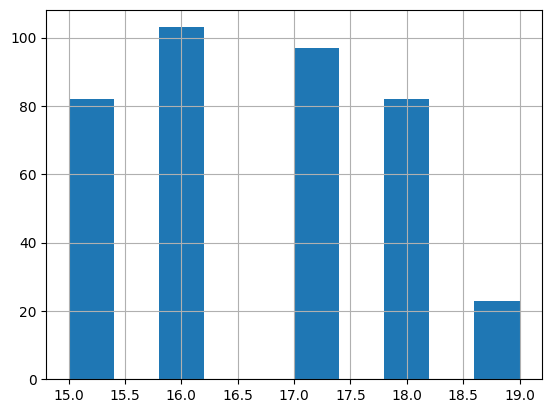

In [35]:
df['age'].hist()

In [22]:
df["age"].value_counts()

age
16    104
17     98
18     82
15     82
19     24
Name: count, dtype: int64

In [21]:
#Eliminamos datos de 20 en adelante debido a que son anomalías
df = df[df['age'] < 20]

In [24]:
df["address"].value_counts()

address
1    303
0     87
Name: count, dtype: int64

In [25]:
df["famsize"].value_counts()

famsize
1    277
0    113
Name: count, dtype: int64

In [26]:
df["Parrent_status"].value_counts()

Parrent_status
0    351
1     39
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x26e03d7c9e0>,
 'caps': [<matplotlib.lines.Line2D at 0x26e03d7cf80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x26e03d7c710>],
 'medians': [<matplotlib.lines.Line2D at 0x26e03d7d460>],
 'fliers': [<matplotlib.lines.Line2D at 0x26e03d7d790>],
 'means': []}

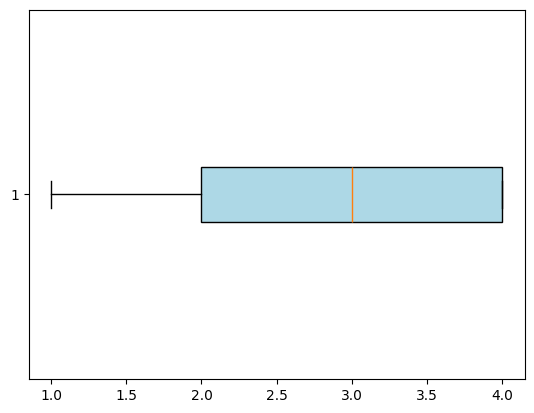

In [34]:
plt.boxplot(df['Mother_edu'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

In [33]:
df["Mother_edu"].value_counts()

Mother_edu
4    130
2    102
3     97
1     58
Name: count, dtype: int64

In [32]:
# Eliminamos valores menores iguales a 0
df = df[df['Mother_edu'] != 0]

{'whiskers': [<matplotlib.lines.Line2D at 0x26e03ddd760>,
 'caps': [<matplotlib.lines.Line2D at 0x26e03ecc080>,
 'boxes': [<matplotlib.patches.PathPatch at 0x26e03e97770>],
 'medians': [<matplotlib.lines.Line2D at 0x26e03ecc620>],
 'fliers': [<matplotlib.lines.Line2D at 0x26e03ecc770>],
 'means': []}

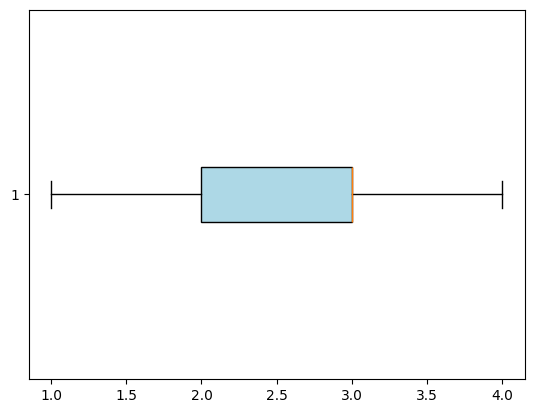

In [40]:
plt.boxplot(df['Father_edu'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

In [39]:
df["Father_edu"].value_counts()

Father_edu
2    110
3    100
4     96
1     79
Name: count, dtype: int64

In [38]:
# Eliminamos valores menores iguales a 0
df = df[df['Father_edu'] != 0]

In [42]:
df["Mother_job"].value_counts()

Mother_job
other       138
services    100
at_home      57
teacher      57
health       33
Name: count, dtype: int64

In [43]:
df["Father_job"].value_counts()

Father_job
other       210
services    109
teacher      29
at_home      19
health       18
Name: count, dtype: int64

In [46]:
df["reason_to_chose_school"].value_counts()

reason_to_chose_school
course        139
home          108
reputation    104
other          34
Name: count, dtype: int64

In [47]:
df["guardian"].value_counts()

guardian
mother    269
father     89
other      27
Name: count, dtype: int64

<Axes: >

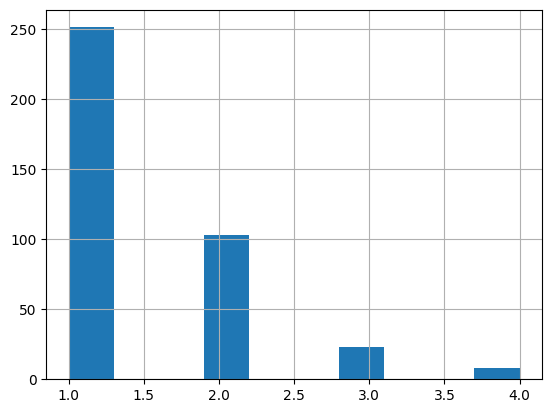

In [48]:
df["traveltime"].hist()

In [49]:
df["traveltime"].value_counts()

traveltime
1    251
2    103
3     23
4      8
Name: count, dtype: int64

<Axes: >

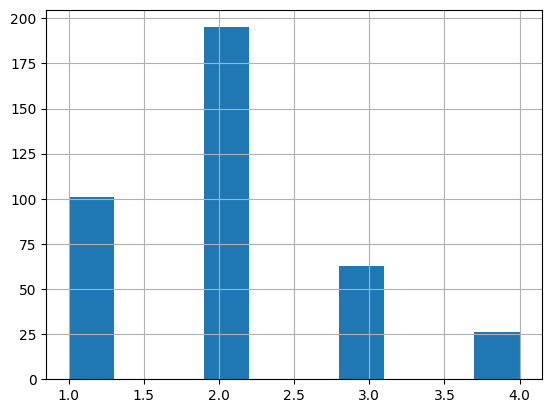

In [50]:
df["weekly_studytime"].hist()

In [51]:
df["weekly_studytime"].value_counts()

weekly_studytime
2    195
1    101
3     63
4     26
Name: count, dtype: int64

In [52]:
df["extra_edu_supp"].value_counts()

extra_edu_supp
0    334
1     51
Name: count, dtype: int64

In [53]:
df["family_edu_supp"].value_counts()

family_edu_supp
1    238
0    147
Name: count, dtype: int64

In [54]:
df["extra_paid_class"].value_counts()

extra_paid_class
0    208
1    177
Name: count, dtype: int64

In [55]:
df["extra_curr_activities"].value_counts()

extra_curr_activities
1    198
0    187
Name: count, dtype: int64

In [56]:
df["nursery"].value_counts()

nursery
1    309
0     76
Name: count, dtype: int64

In [57]:
df["Interested_in_higher_edu"].value_counts()

Interested_in_higher_edu
1    367
0     18
Name: count, dtype: int64

In [58]:
df["internet_access"].value_counts()

internet_access
1    323
0     62
Name: count, dtype: int64

In [59]:
df["romantic_relationship"].value_counts()

romantic_relationship
0    256
1    129
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x26e060cc230>,
 'caps': [<matplotlib.lines.Line2D at 0x26e08229df0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x26e082298e0>],
 'medians': [<matplotlib.lines.Line2D at 0x26e0822a3c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26e0822a6c0>],
 'means': []}

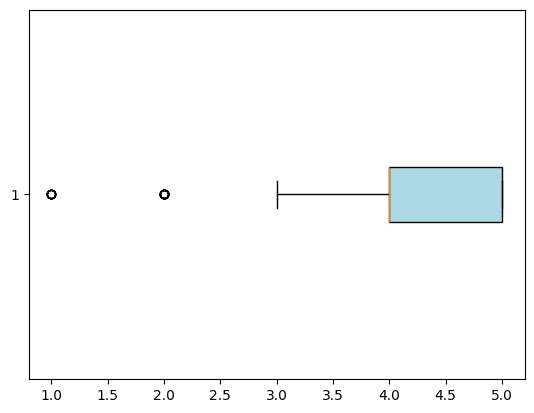

In [61]:
plt.boxplot(df['Family_quality_reln'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

In [62]:
df["Family_quality_reln"].value_counts()

Family_quality_reln
4    193
5    101
3     65
2     18
1      8
Name: count, dtype: int64

<Axes: >

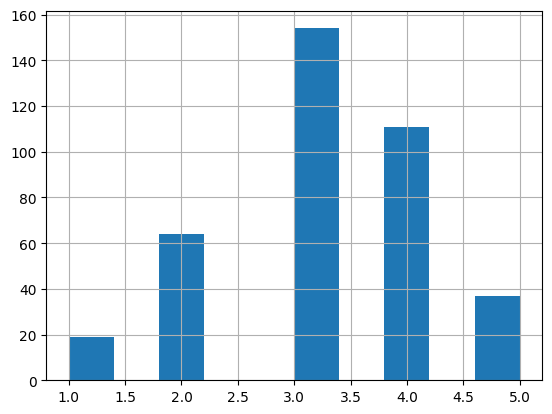

In [63]:
df["freetime_after_school"].hist()

In [64]:
df["freetime_after_school"].value_counts()

freetime_after_school
3    154
4    111
2     64
5     37
1     19
Name: count, dtype: int64

<Axes: >

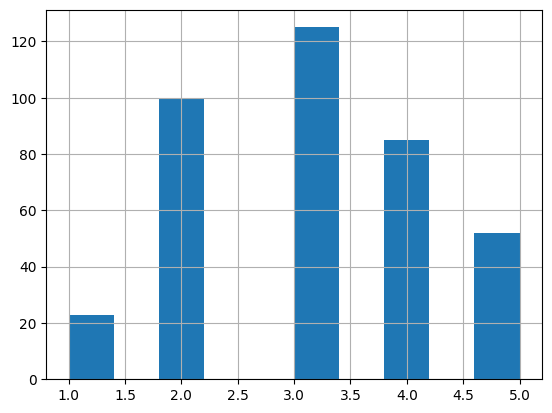

In [65]:
df["goout_with_friends"].hist()

In [66]:
df["goout_with_friends"].value_counts()

goout_with_friends
3    125
2    100
4     85
5     52
1     23
Name: count, dtype: int64

<Axes: >

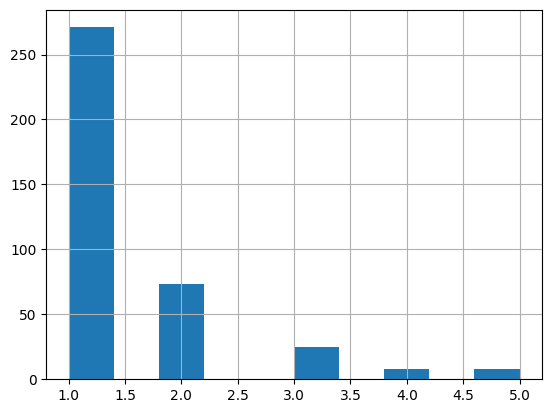

In [67]:
df["workday_alcohol_consum"].hist()

In [68]:
df["workday_alcohol_consum"].value_counts()

workday_alcohol_consum
1    271
2     73
3     25
5      8
4      8
Name: count, dtype: int64

<Axes: >

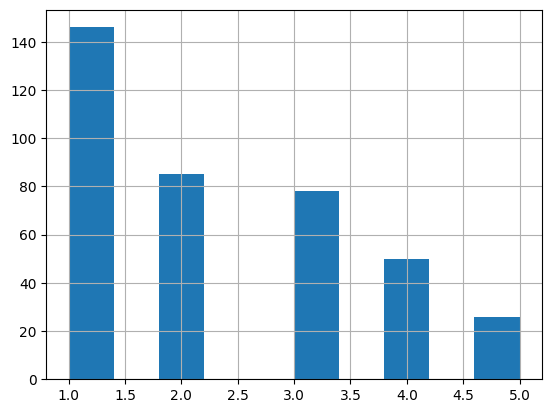

In [69]:
df["weekend_alcohol_consum"].hist()

In [70]:
df["weekend_alcohol_consum"].value_counts()

weekend_alcohol_consum
1    146
2     85
3     78
4     50
5     26
Name: count, dtype: int64

<Axes: >

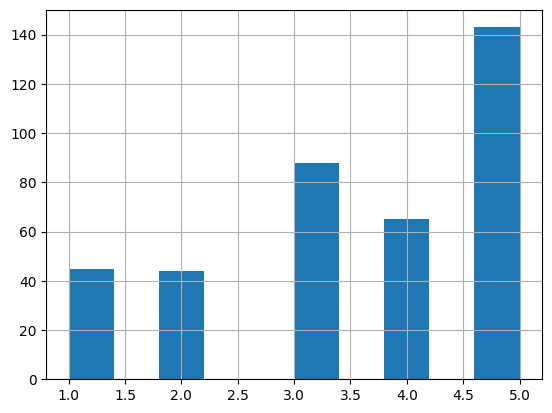

In [71]:
df["health_status"].hist()

In [72]:
df["health_status"].value_counts()

health_status
5    143
3     88
4     65
1     45
2     44
Name: count, dtype: int64

<Axes: >

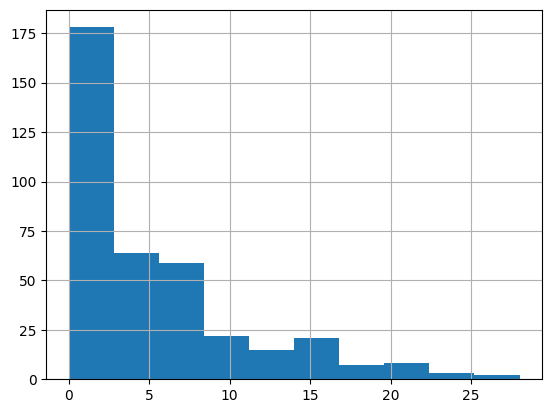

In [78]:
df["absences"].hist()

In [77]:
df["absences"].value_counts()

absences
0     112
2      63
4      52
6      31
8      21
10     17
12     12
14     12
7       7
3       7
16      6
18      5
5       5
20      4
22      3
13      3
1       3
9       3
15      3
11      2
25      1
24      1
28      1
26      1
19      1
21      1
23      1
17      1
Name: count, dtype: int64

In [ ]:
#removemos los alumnos con más de 30 ausencias
df = df[df['absences'] < 30]


<Axes: >

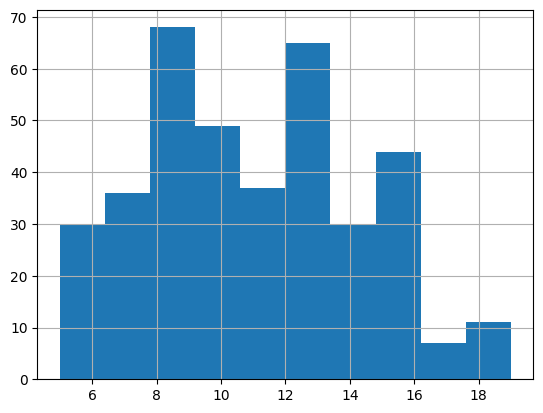

In [87]:
df["G1"].hist()

In [86]:
df["G1"].value_counts()

G1
10    49
8     39
11    37
7     36
12    35
13    30
14    30
9     29
6     23
15    23
16    21
18     8
5      7
17     7
19     3
Name: count, dtype: int64

In [ ]:
#Eliminamos los alumnos con notas menores a 4
df = df[df['G1'] > 4]


<Axes: >

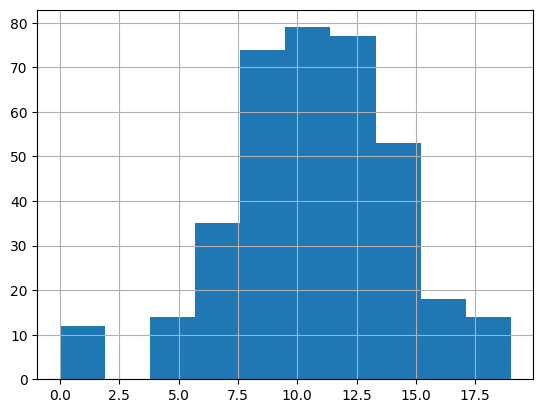

In [96]:
df["G2"].hist()

In [95]:
df["G2"].value_counts()

G2
10    46
9     46
12    40
13    37
11    33
15    31
8     28
14    22
7     21
5     14
6     14
16    13
0     12
18    11
17     5
19     3
Name: count, dtype: int64

In [94]:
df = df[df['G2'] != 4]

<Axes: >

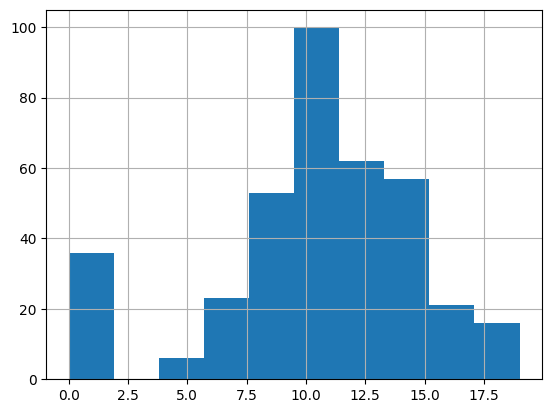

In [102]:
df["G3"].hist()

In [101]:
df["G3"].value_counts()

G3
10    55
11    45
0     36
12    31
13    31
15    30
8     28
14    27
9     25
6     15
16    15
18    11
7      8
17     6
5      6
19     5
Name: count, dtype: int64

In [100]:
#Eliminamos los alumnos con notas iguales a 4 y 20
df = df[df['G3'] != 4]
df = df[df['G3'] != 20]

In [103]:
# Tabla final
df.head()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,reason_to_chose_school,guardian,traveltime,weekly_studytime,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,1,0,18,1,1,1,4,4,at_home,teacher,course,mother,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,1,0,1,1,at_home,other,course,father,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,0,0,1,1,at_home,other,other,mother,1,2,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,1,0,4,2,health,services,home,mother,1,3,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,1,0,3,3,other,other,home,father,1,2,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


## Preparación de datos

In [106]:
# Seleccionamos solo las columnas numéricas
df_numericas = df.select_dtypes(include=['float64', 'int64'])

#Normalizacion
scaler = StandardScaler()
df_normalizada = pd.DataFrame(scaler.fit_transform(df_numericas), columns=df_numericas.columns)
df_normalizada.head()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,traveltime,weekly_studytime,extra_edu_supp,family_edu_supp,extra_paid_class,extra_curr_activities,nursery,Interested_in_higher_edu,internet_access,romantic_relationship,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,0.360429,-0.937762,1.150594,0.534063,0.641343,3.064129,1.152109,1.340643,0.775931,-0.048251,2.545584,-1.278203,-0.927737,-1.027105,0.496655,0.218218,-2.243270,-0.691564,0.068034,-0.229843,0.789772,-0.534041,-1.008368,-0.406928,0.171022,-1.825878,-1.281598,-0.980776
1,0.360429,-0.937762,0.313391,0.534063,0.641343,-0.326357,-1.639826,-1.429525,-0.639670,-0.048251,-0.392837,0.782348,-0.927737,-1.027105,-2.013468,0.218218,0.445778,-0.691564,1.174325,-0.229843,-0.105303,-0.534041,-1.008368,-0.406928,-0.182360,-1.825878,-1.551636,-0.980776
2,0.360429,-0.937762,-1.361014,0.534063,-1.559228,-0.326357,-1.639826,-1.429525,-0.639670,-0.048251,2.545584,-1.278203,1.077891,-1.027105,0.496655,0.218218,0.445778,-0.691564,0.068034,-0.229843,-1.000378,0.607281,0.559739,-0.406928,0.877786,-1.211779,-0.741522,-0.099021
3,0.360429,-0.937762,-1.361014,0.534063,0.641343,-0.326357,1.152109,-0.506136,-0.639670,1.154819,-0.392837,0.782348,1.077891,0.973610,0.496655,0.218218,0.445778,1.445998,-1.038257,-1.241153,-1.000378,-0.534041,-1.008368,1.042510,-0.535742,1.244618,0.878707,1.003174
4,0.360429,-0.937762,-0.523811,0.534063,0.641343,-0.326357,0.221464,0.417253,-0.639670,-0.048251,-0.392837,0.782348,1.077891,-1.027105,0.496655,0.218218,-2.243270,-0.691564,0.068034,-0.229843,-1.000378,-0.534041,-0.224315,1.042510,-0.182360,-1.518828,-0.201446,-0.099021


## Analisis general

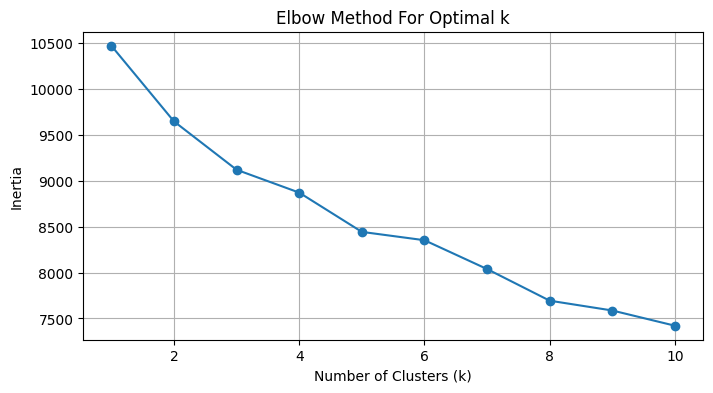

In [108]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalizada)
    inertia.append(kmeans.inertia_)


# Graficar el resultado
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Asignar número de clusters
k = 4

# Entrenar modelo
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_normalizada)

df_clustering = df.copy()
df_clustering['cluster'] = kmeans.labels_

In [110]:
df_clustering['cluster'].value_counts()


cluster
2    129
0    112
1     79
3     54
Name: count, dtype: int64

In [111]:
df_clustering.groupby('cluster').describe()


school                                                 sex            \
         count      mean       std  min  25%  50%  75%  max  count      mean   
cluster                                                                        
0        112.0  0.946429  0.226182  0.0  1.0  1.0  1.0  1.0  112.0  0.151786   
1         79.0  0.810127  0.394707  0.0  1.0  1.0  1.0  1.0   79.0  0.556962   
2        129.0  0.961240  0.193774  0.0  1.0  1.0  1.0  1.0  129.0  0.534884   
3         54.0  0.685185  0.468803  0.0  0.0  1.0  1.0  1.0   54.0  0.833333   

                                              age                             \
              std  min  25%  50%  75%  max  count       mean       std   min   
cluster                                                                        
0        0.360426  0.0  0.0  0.0  0.0  1.0  112.0  16.455357  1.199763  15.0   
1        0.499919  0.0  0.0  1.0  1.0  1.0   79.0  16.898734  1.138993  15.0   
2        0.500726  0.0  0.0  1.0  1.0  1.0  129.0  16.302326  1.136089  15.0   
3        0.376177  0.0  1.0  1.0  1.0  1.0   54.0  17.351852  1.030798  15.0   

                                address                                     \
          25%   50%   75%   max   count      mean       std  min  25%  50%   
cluster                                                                      
0        15.0  16.0  17.0  19.0   112.0  0.803571  0.399082  0.0  1.0  1.0   
1        16.0  17.0  18.0  19.0    79.0  0.772152  0.422124  0.0  1.0  1.0   
2        15.0  16.0  17.0  19.0   129.0  0.860465  0.347855  0.0  1.0  1.0   
3        17.0  17.5  18.0  19.0    54.0  0.537037  0.503308  0.0  0.0  1.0   

                  famsize                                                \
         75%  max   count      mean       std  min   25%  50%  75%  max   
cluster                                                                   
0        1.0  1.0   112.0  0.750000  0.434959  0.0  0.75  1.0  1.0  1.0   
1        1.0  1.0    79.0  0.607595  0.491406  0.0  0.00  1.0  1.0  1.0   
2        1.0  1.0   129.0  0.751938  0.433572  0.0  1.00  1.0  1.0  1.0   
3        1.0  1.0    54.0  0.666667  0.475831  0.0  0.00  1.0  1.0  1.0   

        Parrent_status                                               \
                 count      mean       std  min  25%  50%  75%  max   
cluster                                                               
0                112.0  0.107143  0.310685  0.0  0.0  0.0  0.0  1.0   
1                 79.0  0.063291  0.245042  0.0  0.0  0.0  0.0  1.0   
2                129.0  0.124031  0.330902  0.0  0.0  0.0  0.0  1.0   
3                 54.0  0.055556  0.231212  0.0  0.0  0.0  0.0  1.0   

        Mother_edu                                              Father_edu  \
             count      mean       std  min  25%  50%  75%  max      count   
cluster                                                                      
0            112.0  2.339286  0.982308  1.0  2.0  2.0  3.0  4.0      112.0   
1             79.0  2.481013  0.972187  1.0  2.0  2.0  3.0  4.0       79.0   
2            129.0  3.542636  0.718155  1.0  3.0  4.0  4.0  4.0      129.0   
3             54.0  2.185185  1.082870  1.0  1.0  2.0  3.0  4.0       54.0   

                                                     traveltime            \
             mean       std  min  25%  50%  75%  max      count      mean   
cluster                                                                     
0        2.267857  1.013265  1.0  1.0  2.0  3.0  4.0      112.0  1.383929   
1        2.139241  1.009369  1.0  1.0  2.0  3.0  4.0       79.0  1.443038   
2        3.286822  0.802280  1.0  3.0  3.0  4.0  4.0      129.0  1.263566   
3        1.962963  0.989815  1.0  1.0  2.0  2.0  4.0       54.0  2.055556   

                                           weekly_studytime            \
              std  min  25%  50%  75%  max            count      mean   
cluster                                                                 
0        

In [117]:
# Usamos las notas g1, g2, g3 como características
y = df[['G1', 'G2', 'G3']]  # Características (notas)

X = df.drop(columns=['G1', 'G2', 'G3'])


# Paso 1: 80% Train + 20% Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: del 80% original, saca 80% Train y 20% Validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# ✅ Resultado: 
# X_train: 64% del total
# X_val: 16% del total
# X_test: 20% del total

# Verifica tamaños si quieres:
print(f"Train: {len(X_train)}")
print(f"Validation: {len(X_val)}")
print(f"Test: {len(X_test)}")

Train: 239
Validation: 60
Test: 75


In [119]:

# 2. Unimos cada X con su y respectiva
train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)
# 2. Guardamos los archivos CSV
train.to_csv('train.csv', index=False)
val.to_csv('validation.csv', index=False)
test.to_csv('test.csv', index=False)


## Analisis de variables usando arbol de decision


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

df_numericas = df.select_dtypes(include=['float64', 'int64'])

# Normalización
scaler = StandardScaler()
df_normalizada = pd.DataFrame(scaler.fit_transform(df_numericas), columns=df_numericas.columns)

X = df_normalizada.drop('G3', axis=1)  # Características
y = df_normalizada['G3']  # Etiqueta

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=4, random_state=42)

model.fit(X_train, y_train)

score_val = model.score(X_val, y_val)
print(f"Validation R^2 Score: {score_val:.2f}")

score_test = model.score(X_test, y_test)
print(f"Test R^2 Score: {score_test:.2f}")


Validation R^2 Score: 0.91
Test R^2 Score: 0.73


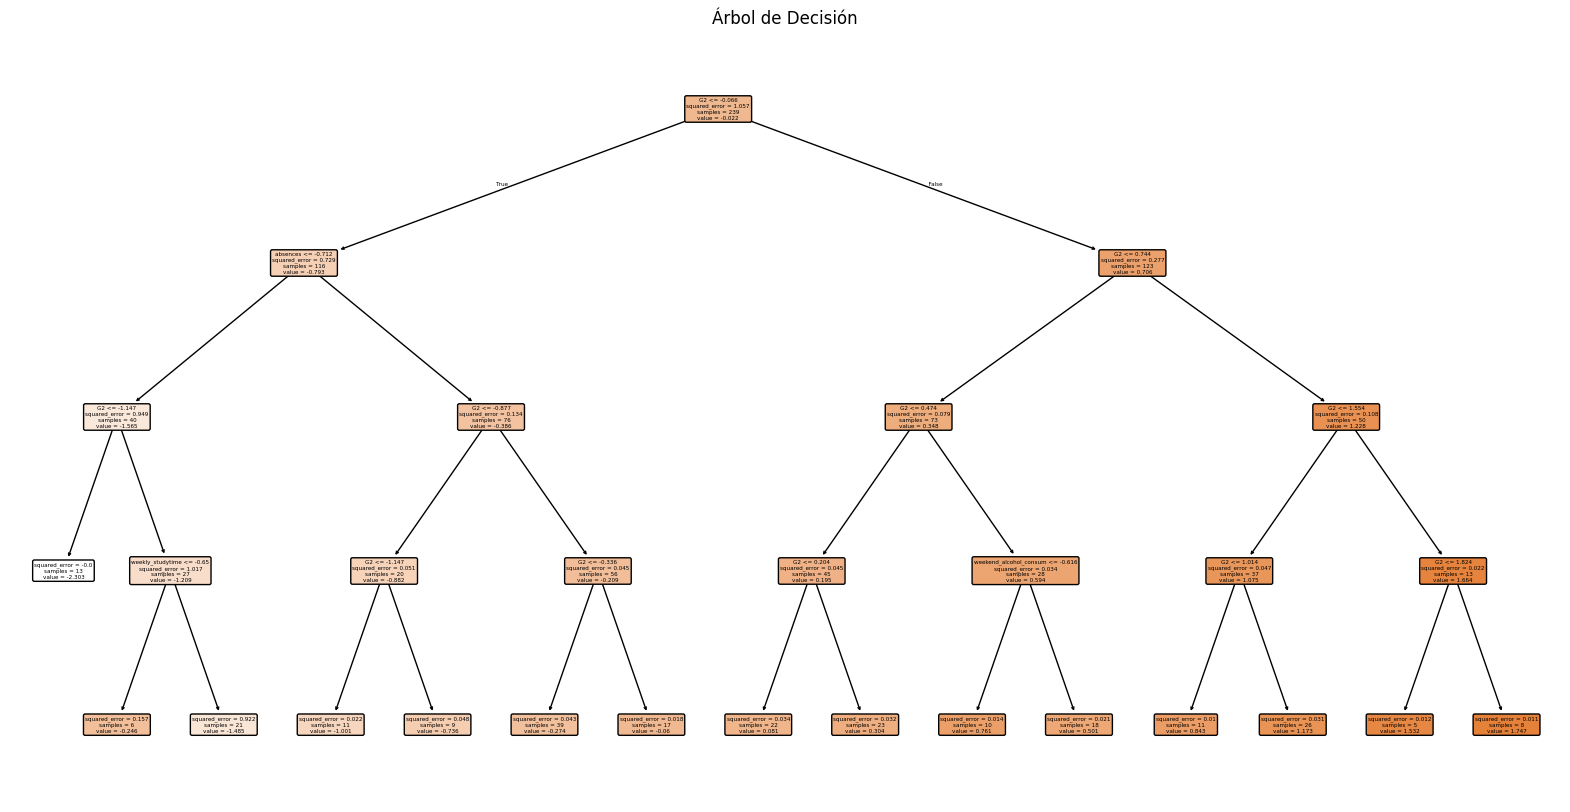

In [131]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.savefig("../arbol.jpg", format='jpg', dpi=300, bbox_inches='tight')